In [1]:
import pylab as pl
import pandas as pd
import numpy as np
import scipy.stats
import statsmodels.formula.api as smf
import os
import json
import matplotlib.pyplot as plt

%matplotlib inline



In [2]:
trees = pd.read_csv('https://data.cityofnewyork.us/api/views/5rq2-4hqu/rows.csv')
trees.head()

,created_at,tree_id,block_id,the_geom,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,...,st_assem,st_senate,nta,nta_name,boro_ct,state,Latitude,longitude,x_sp,y_sp
0,08/27/2015,180683.0,348711.0,POINT (-73.84421521958048 40.723091773924274),3.0,0.0,OnCurb,Alive,Fair,Acer rubrum,...,28.0,16.0,QN17,Forest Hills,4073900.0,New York,40.723092,-73.844215,1.027431e+06,202756.768749
1,09/03/2015,200540.0,315986.0,POINT (-73.81867945834878 40.79411066708779),21.0,0.0,OnCurb,Alive,Fair,Quercus palustris,...,27.0,11.0,QN49,Whitestone,4097300.0,New York,40.794111,-73.818679,1.034456e+06,228644.837379
2,09/05/2015,204026.0,218365.0,POINT (-73.93660770459083 40.717580740099116),3.0,0.0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,...,50.0,18.0,BK90,East Williamsburg,3044900.0,New York,40.717581,-73.936608,1.001823e+06,200716.891267
3,09/05/2015,204337.0,217969.0,POINT (-73.93445615919741 40.713537494833226),10.0,0.0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,...,53.0,18.0,BK90,East Williamsburg,3044900.0,New York,40.713537,-73.934456,1.002420e+06,199244.253136
4,08/30/2015,189565.0,223043.0,POINT (-73.97597938483258 40.66677775537875),21.0,0.0,OnCurb,Alive,Good,Tilia americana,...,44.0,21.0,BK37,Park Slope-Gowanus,3016500.0,New York,40.666778,-73.975979,9.909138e+05,182202.425999


In [3]:
trees.columns

Index([u'created_at', u'tree_id', u'block_id', u'the_geom', u'tree_dbh',
       u'stump_diam', u'curb_loc', u'status', u'health', u'spc_latin',
       u'spc_common', u'steward', u'guards', u'sidewalk', u'user_type',
       u'problems', u'root_stone', u'root_grate', u'root_other', u'trnk_wire',
       u'trnk_light', u'trnk_other', u'brnch_ligh', u'brnch_shoe',
       u'brnch_othe', u'address', u'zipcode', u'zip_city', u'cb_num',
       u'borocode', u'boroname', u'cncldist', u'st_assem', u'st_senate',
       u'nta', u'nta_name', u'boro_ct', u'state', u'Latitude', u'longitude',
       u'x_sp', u'y_sp'],
      dtype='object')

In [4]:
trees = trees[['tree_id', 'health', 'boroname']]
trees.rename(columns={'tree_id': 'Frequency', 'health': 'Tree Health', 'boroname': 'NYC Borough Name'}, inplace=True)
trees.head()

,Frequency,Tree Health,NYC Borough Name
0,180683.0,Fair,Queens
1,200540.0,Fair,Queens
2,204026.0,Good,Brooklyn
3,204337.0,Good,Brooklyn
4,189565.0,Good,Brooklyn


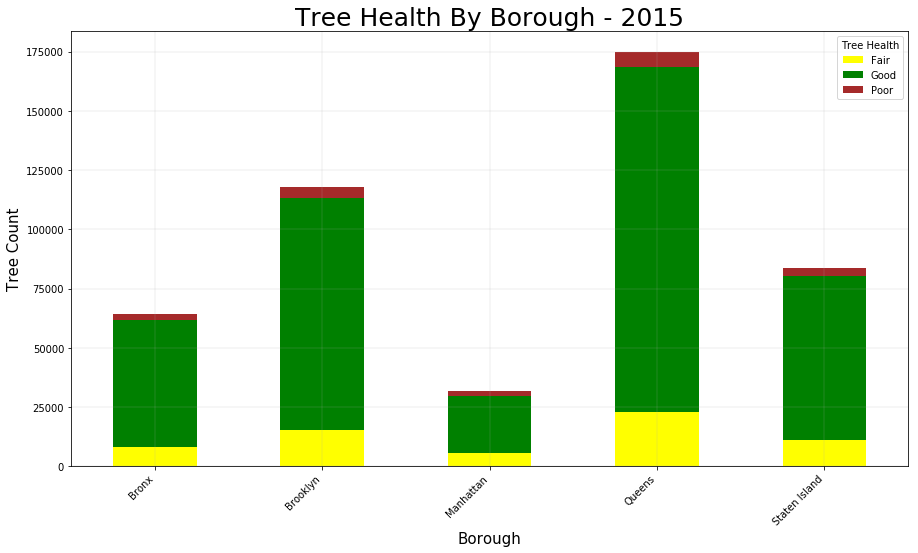

In [5]:

df1 = trees.groupby(['NYC Borough Name', 'Tree Health'])['Frequency'].count().unstack('Tree Health')
df1.plot(kind='bar', stacked=True, figsize=(15,8), color=('yellow', 'green', 'brown'))

plt.title('Tree Health By Borough - 2015', fontsize=25)
plt.ylabel('Tree Count', fontsize=15)
plt.xlabel('Borough', fontsize=15)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.grid(linewidth=.2)    


In [6]:
cols = list(df1.columns.values)
cols


['Fair', 'Good', 'Poor']

In [7]:
# df1 = df1.reindex_axis(['Good', 'Fair', 'Poor'], axis=1)
# df1

In [8]:
# # Create a figure with a single subplot
# f, ax = plt.subplots(1, figsize=(10,5))

# # Set bar width at 1
# bar_width = 1

# # positions of the left bar-boundaries
# bar_l = [i for i in range(len(df['Fair']))] 

# # positions of the x-axis ticks (center of the bars as bar labels)
# tick_pos = [i+(bar_width/2) for i in bar_l] 

# # Create the total score for each participant
# totals = [i+j+k for i,j,k in zip(df['Fair'], df['Good'], df['Poor'])]

# # Create the percentage of the total score the pre_score value for each participant was
# fair = [i / j * 100 for  i,j in zip(df['Fair'], totals)]

# # Create the percentage of the total score the mid_score value for each participant was
# good = [i / j * 100 for  i,j in zip(df['Good'], totals)]

# # Create the percentage of the total score the post_score value for each participant was
# poor = [i / j * 100 for  i,j in zip(df['Poor'], totals)]

# # Create a bar chart in position bar_1
# ax.bar(bar_l, 
#        # using pre_rel data
#        fair, 
#        # labeled 
#        label='Fair', 
#        # with alpha
#        alpha=0.9, 
#        # with color
#        color='#019600',
#        # with bar width
#        width=bar_width,
#        # with border color
#        edgecolor='white'
#        )

# # Create a bar chart in position bar_1
# ax.bar(bar_l, 
#        # using mid_rel data
#        good, 
#        # with pre_rel
#        bottom=fair, 
#        # labeled 
#        label='Good', 
#        # with alpha
#        alpha=0.9, 
#        # with color
#        color='#3C5F5A', 
#        # with bar width
#        width=bar_width,
#        # with border color
#        edgecolor='white'
#        )

# # Create a bar chart in position bar_1
# ax.bar(bar_l, 
#        # using poor data
#        poor, 
#        # with fair and good on bottom
#        bottom=[i+j for i,j in zip(fair, good)], 
#        # labeled 
#        label='Poor',
#        # with alpha
#        alpha=0.9, 
#        # with color
#        color='#219AD8', 
#        # with bar width
#        width=bar_width,
#        # with border color
#        edgecolor='white'
#        )

# # Set the ticks to be first names
# plt.xticks(tick_pos, df['boroname'])
# ax.set_ylabel("Percentage")
# ax.set_xlabel("")

# # Let the borders of the graphic
# plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
# plt.ylim(-10, 110)

# # rotate axis labels
# plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

# # shot plot
# plt.show()